# Model of the solar interior
## Taken from *Theory of stellar pulsations - Christensen-Dalsgaard*

The values of the thermodynamic variables are taken from [This model](http://users-phys.au.dk/jcd/solar_models/cptrho.l5bi.d.15c).


As found by [Kosovichev](https://www.springer.com/la/book/9783642199271#otherversion=9783642199288 "Pages 3-84"), the equation for the distance $\Delta$ is given by


$$\Delta = 2\int_{r_1}^{R}\frac{c/r}{\sqrt{\omega ^2/L^2-c^2/r^2}}dr$$

Where $c$, is the sound speed, $L=\sqrt{l(l+1)}$, and $\omega ^2= {k_h}^2+{k_r}^2$.

The time travel is

$$\tau = \int_{r_1}^{R} \frac{dr}{c\sqrt{1-L^2c^2/r^2\omega^2}}$$



[Alt text](../Images/sunquake.png)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = open("../Data/solar_model_interior.txt","r")

In [3]:
data = [i for i in data]

model = []
r_R, c, rho, P, gamma_1, T = [], [], [], [], [], []
for i in range(5,len(data)):
    a = data[i].split()
    r_R.append(float(a[0]))
    c.append(float(a[1]))
    rho.append(float(a[2]))
    P.append(float(a[3]))
    gamma_1.append(float(a[4]))
    T.append(float(a[5]))

c_2 = []
for i in range(len(model)):
    x = float(gamma_1[i])
    y = float(P[i])
    z = float(rho[i])
    c_2.append(x*y*2e-8/z)
 

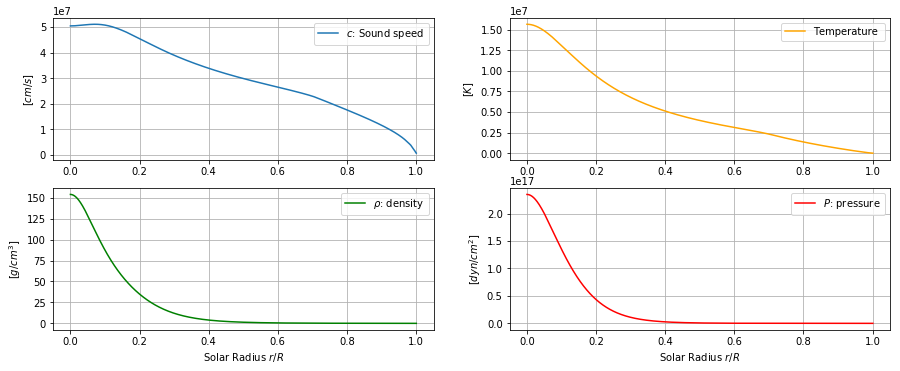

In [4]:
f = plt.figure(figsize=(15,12))

ax1 = f.add_subplot(421)
ax1.plot(r_R,c,label='$c$: Sound speed ')
plt.ylabel('[$cm/s$]')
ax1.grid()
ax1.legend()

ax2 = f.add_subplot(422)
ax2.plot(r_R,T,'orange',label='Temperature ')
plt.ylabel('[$K$]')
ax2.grid()
ax2.legend()

ax3 = f.add_subplot(423)
ax3.plot(r_R,rho,'g',label=r'$\rho$: density ')
plt.ylabel('[$g/cm^3$]')
plt.xlabel('Solar Radius $r/R$')
ax3.grid()
ax3.legend()

ax4 = f.add_subplot(424)
ax4.plot(r_R,P,'r',label=r'$P$: pressure ')
plt.ylabel('[$dyn/cm^2$]')
plt.xlabel('Solar Radius $r/R$')
ax4.grid()
ax4.legend()

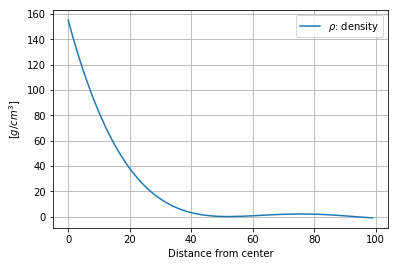

In [5]:
# Another fit found in https://www.nasa.gov/pdf/714670main_Algebra2.pdf

def rho_2(x):
    r = 519*x**4- 1630*x**3 +1844*x**2- 889*x +155
    return r

x= np.linspace(0,1,100)
plt.plot(rho_2(x),label=r'$\rho$: density')
plt.xlabel('Distance from center')
plt.ylabel(r'[$g/cm^3$]')
plt.legend()
plt.grid()

---
### First model of ray-path
Approximation under the non-physical conditions of density and constant pressure

1082047278.7620206

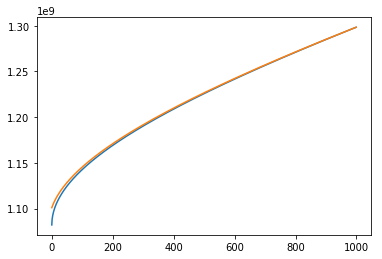

In [6]:
T = 6000
k_b = 1.38e-23
gamma = 5/3


c = 100 # Random value, for visualization
l = 30
v = 0.005
w = 2*np.pi*v

L = np.sqrt(l*(l+1))
a = L**2*c**2/w**2
r = np.linspace(a,2.0001*a,1000)
r2 = np.linspace(1.01*a,2.0001*a,1000)


def tdplot(rad):
    up = 1/c*(rad*np.sqrt(1-a/rad)+0.5*a*np.log(2*rad*(np.sqrt(1-a/rad)+1)-a))
    return up

plt.plot(tdplot(r))
plt.plot(tdplot(r2))
tdplot(a)